In [75]:
# Imports
import numpy as np
from PIL import Image, ImageDraw
import h5py
import os
import torch
from torch.utils import data
from torch.utils.data import Dataset

import cv2
import matplotlib.pyplot as plt
import random

import data_utils

In [1]:
# utils here to convert filtered_yolo_data to semantic segmentation data

In [84]:
images_repo = '/Users/vihaan/Workspace/Local_AI_Earth/DataManipulation/filtered_ls_data/images'
yolo_labels_repo = '/Users/vihaan/Workspace/Local_AI_Earth/DataManipulation/filtered_ls_data/labels'
target_map_repo = '/Users/vihaan/Workspace/Local_AI_Earth/DataManipulation/semantic_filtered_data/masks'
target_img_repo = '/Users/vihaan/Workspace/Local_AI_Earth/DataManipulation/semantic_filtered_data/images'

In [85]:
# Getting list of images, their names and paths
images_list = os.listdir(images_repo) # image names with extension
image_names = [os.path.splitext(f)[0] for f in images_list] # image names without extension

for image_file in images_list:

    # Getting the image path (with extension)
    image_path = images_repo + '/' + image_file 

    # Corresponding labels file:
    image_name = os.path.splitext(image_file)[0]
    label_path = yolo_labels_repo + '/' + image_name + '.txt'
    
    # Target path of the segmentation map:
    target_path = target_map_repo + '/' + image_name + '.npy'
    
    # Target path for image to be saved in semantic segmentation folder:
    image_copy_path = target_img_repo + '/' + image_name + '.npy'

    # Calling function for all images in the folder:
    create_segmentation_map(image_path,label_path,target_path,image_copy_path)


In [86]:
def create_segmentation_map(image_path,label_path,target_path_seg,target_path_img):
    """
    Create and save a segmentation map using image and its YOLO annotation.
    
    Parameters:
    - image_path (str): Path to the input image.
    - label_path (str): Path to the YOLO annotation corresponding to the image.
    - output_path (str): Path to save the segmentation map.
    """

    # Finding corresponding file in labels folder:
    img = cv2.imread(image_path)
    h, w, _ = img.shape

    # Create a blank mask
    seg_map = np.zeros((h, w), dtype=np.uint8)

    # Create an Image object to draw on
    seg_map_image = Image.fromarray(seg_map)
    draw = ImageDraw.Draw(seg_map_image)
    
    # Open yolo annotations
    # Open and read the label file
    with open(label_path, 'r') as file:
        lines = file.readlines()

        for line in lines:
            parts = line.strip().split()

            # Ignore the first part which is the class ID
            coords = parts[1:]
            polygon = [(int(float(coords[i])*w), int(float(coords[i + 1])*h)) for i in range(0, len(coords), 2)]

            # Draw the polygon on the image
            draw.polygon(polygon, fill=1) # Landslide = 1, non-landslide = 0

    #convert back to np.array
    seg_map = np.array(seg_map_image)
    
    #Target path to save
    np.save(target_path_seg,seg_map)
    np.save(target_path_img,img)
    #plt.imshow(seg_map)

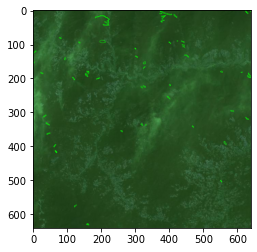

In [97]:
# Checking if it worked properly:

test_name = random.choice(image_names)
   
# Printing the labels and images from yolo
image_path = images_repo + '/' + test_name + '.jpeg'
label_path = yolo_labels_repo + '/' + test_name + '.txt'
target_seg_path = target_map_repo + '/' + test_name + '.npy'
target_img_path = target_img_repo + '/' + test_name + '.npy'

# priting the image
data_utils.print_labels_on_image_jupyter_notebook(image_path, label_path)




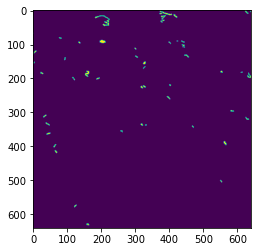

In [98]:
# Checking the binary map
temp_map = np.load(target_seg_path)
plt.imshow(temp_map)

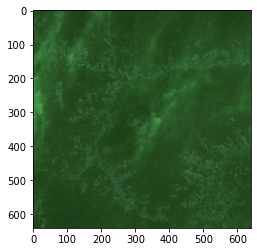

In [99]:
# Showing the image
temp_img = np.load(target_img_path)
plt.imshow(temp_img)